"we rate dogs Uadicity project"



In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import re
import time
%matplotlib inline

# step 1: Gathering data

In [3]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
page = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(page)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
    

In [52]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# Reading Jason file


In [53]:
tweets= []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        tweets.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
        
tweets_df = pd.DataFrame(tweets)
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [54]:
tweets_df.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


# Assessing process

# (1) visual assessment

In [55]:
twitter_archive 


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [56]:
image_predictions


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [57]:
tweets_df

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256
5,20562,3261,891087950875897856
6,12041,2158,890971913173991426
7,56848,16716,890729181411237888
8,28226,4429,890609185150312448
9,32467,7711,890240255349198849


# 2)programatic assessment

In [58]:
twitter_archive .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [59]:
twitter_archive .describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [60]:
twitter_archive.isnull().sum(axis = 0)

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [14]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [61]:
twitter_archive.floofer .value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [12]:
twitter_archive.pupper .value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [13]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [14]:
twitter_archive.rating_numerator .value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [62]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [45]:
tweets_df.describe()

,favorite_count,retweet_count,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


In [63]:
tweets_df.isnull().sum()

favorite_count    0
retweet_count     0
tweet_id          0
dtype: int64

In [18]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [64]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [53]:
image_predictions.isnull().sum(axis=0)

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [59]:
twitter_archive.duplicated().value_counts()


False    2356
dtype: int64

In [65]:
tweets_df.duplicated().value_counts()

False    2354
dtype: int64

In [66]:
image_predictions.duplicated().value_counts()

False    2075
dtype: int64

# defining  issues

In [67]:
cleaned_1 = twitter_archive.copy()
cleaned_2 = image_predictions.copy()
cleaned_3 = tweets_df.copy()


# merging the dataframe into one data set

In [68]:
clean = pd.merge(left = cleaned_1,right = cleaned_3 ,left_on='tweet_id',right_on='tweet_id')
new_data =pd.merge(left= clean,right = image_predictions,left_on= 'tweet_id',right_on='tweet_id')
new_data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
favorite_count                2073 

In [69]:
new_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
favorite_count                2073 

In [70]:
new_data.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


# removing unwanted columns

In [72]:
new_data = new_data.drop("retweeted_status_user_id", 1)

In [73]:
new_data = new_data.drop("retweeted_status_timestamp", 1)

In [74]:
new_data = new_data.drop("expanded_urls", axis = 1)

In [75]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                 2073 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2073 non-null object
source                   2073 non-null object
text                     2073 non-null object
retweeted_status_id      79 non-null float64
rating_numerator         2073 non-null int64
rating_denominator       2073 non-null int64
name                     2073 non-null object
doggo                    2073 non-null object
floofer                  2073 non-null object
pupper                   2073 non-null object
puppo                    2073 non-null object
favorite_count           2073 non-null int64
retweet_count            2073 non-null int64
jpg_url                  2073 non-null object
img_num                  2073 non-null int64
p1                       2073 non-null object
p1_conf                  207

# Refine p1, p2 and p3 columns and confidence  combining

In [76]:
prediction = []
confidence = []

def get_prediction_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        prediction.append(dataframe['p1'])
        confidence.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        prediction.append(dataframe['p2'])
        confidence.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        prediction.append(dataframe['p3'])
        confidence.append(dataframe['p3_conf'])
    else:
        prediction.append('NaN')
        confidence.append(0)

new_data.apply(get_prediction_confidence, axis=1)
new_data['prediction'] = prediction
new_data['confidence'] = confidence

In [77]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 29 columns):
tweet_id                 2073 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2073 non-null object
source                   2073 non-null object
text                     2073 non-null object
retweeted_status_id      79 non-null float64
rating_numerator         2073 non-null int64
rating_denominator       2073 non-null int64
name                     2073 non-null object
doggo                    2073 non-null object
floofer                  2073 non-null object
pupper                   2073 non-null object
puppo                    2073 non-null object
favorite_count           2073 non-null int64
retweet_count            2073 non-null int64
jpg_url                  2073 non-null object
img_num                  2073 non-null int64
p1                       2073 non-null object
p1_conf                  207

# removing unusefull columns

In [78]:
new_data = new_data.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

In [79]:
new_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,jpg_url,prediction,confidence
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,None,None,None,None,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,0.000000
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,13,10,Tilly,None,None,None,None,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,12,10,Archie,None,None,None,None,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,13,10,Darla,None,None,None,None,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,12,10,Franklin,None,None,None,None,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712


# refining  dog columns 


In [80]:
new_data.loc[new_data['doggo'] == 'doggo', 'dog'] = 'doggo'
new_data.loc[new_data['floofer'] == 'floofer', 'dog'] = 'floofer'
new_data.loc[new_data['pupper'] == 'pupper', 'dog'] = 'pupper'
new_data.loc[new_data['puppo'] == 'puppo', 'dog'] = 'puppo'

In [103]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2072
Data columns (total 16 columns):
tweet_id                 2058 non-null int64
in_reply_to_status_id    21 non-null float64
in_reply_to_user_id      21 non-null float64
timestamp                2058 non-null object
source                   2058 non-null object
text                     2058 non-null object
retweeted_status_id      79 non-null float64
rating_numerator         2058 non-null object
rating_denominator       2058 non-null int64
name                     1493 non-null object
favorite_count           2058 non-null int64
retweet_count            2058 non-null int64
jpg_url                  2058 non-null object
prediction               2058 non-null object
confidence               2058 non-null float64
dog                      320 non-null object
dtypes: float64(4), int64(4), object(8)
memory usage: 273.3+ KB


# remove unwanted dogtypes 

In [82]:
new_data = new_data.drop(['doggo','floofer','pupper','puppo'],axis=1)

In [83]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 16 columns):
tweet_id                 2073 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2073 non-null object
source                   2073 non-null object
text                     2073 non-null object
retweeted_status_id      79 non-null float64
rating_numerator         2073 non-null int64
rating_denominator       2073 non-null int64
name                     2073 non-null object
favorite_count           2073 non-null int64
retweet_count            2073 non-null int64
jpg_url                  2073 non-null object
prediction               2073 non-null object
confidence               2073 non-null float64
dog                      320 non-null object
dtypes: float64(4), int64(5), object(7)
memory usage: 275.3+ KB


# replacing nan with none

In [84]:
new_data =  new_data.replace('None', np.nan)

In [85]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 16 columns):
tweet_id                 2073 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2073 non-null object
source                   2073 non-null object
text                     2073 non-null object
retweeted_status_id      79 non-null float64
rating_numerator         2073 non-null int64
rating_denominator       2073 non-null int64
name                     1496 non-null object
favorite_count           2073 non-null int64
retweet_count            2073 non-null int64
jpg_url                  2073 non-null object
prediction               2073 non-null object
confidence               2073 non-null float64
dog                      320 non-null object
dtypes: float64(4), int64(5), object(7)
memory usage: 275.3+ KB


# fix rating with non rating values

In [86]:
corrections = new_data[new_data.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

corrections

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


454     RT @dog_rates: "Yep... just as I suspected. Yo...
616     "Yep... just as I suspected. You're not flossi...
825     This is Bookstore and Seaweed. Bookstore is ti...
876     After so many requests, this is Bretagne. She ...
967     Happy 4/20 from the squad! 13/10 for all https...
1001    This is Bluebert. He just saw that both #Final...
1017    Meet Travis and Flurp. Travis is pretty chill ...
1139    This is Socks. That water pup w the super legs...
1229    This may be the greatest video I've ever been ...
1234    Meet Oliviér. He takes killer selfies. Has a d...
1269    When bae says they can't go out but you see th...
1284    This is Eriq. His friend just reminded him of ...
1295    Meet Fynn &amp; Taco. Fynn is an all-powerful ...
1405    This is Darrel. He just robbed a 7/11 and is i...
1527    Meet Tassy &amp; Bee. Tassy is pretty chill, b...
1561    These two pups just met and have instantly bon...
1623    Meet Rufio. He is unaware of the pink legless ...
1627    Two go

In [87]:
for entry in corrections:
    mask = new_data.text == entry
    column_name1 = 'rating_numerator'
    column_name2 = 'rating_denominator'
    new_data.loc[mask, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    new_data.loc[mask, column_name2] = 10

In [88]:
new_data[new_data.text.isin(corrections)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,prediction,confidence,dog
454,802624713319034886,NaN,NaN,2016-11-26 21:26:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Yep... just as I suspected. Yo...",7.776842e+17,11,10,NaN,0,3403,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,cocker_spaniel,0.253442,NaN
616,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yep... just as I suspected. You're not flossi...",NaN,11,10,NaN,12518,3403,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,cocker_spaniel,0.253442,NaN
825,747600769478692864,NaN,NaN,2016-06-28 01:21:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bookstore and Seaweed. Bookstore is ti...,NaN,7,10,Bookstore,2545,619,https://pbs.twimg.com/media/CmAC7ehXEAAqSuW.jpg,Chesapeake_Bay_retriever,0.804363,NaN
876,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,14,10,NaN,20648,9220,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,golden_retriever,0.807644,NaN
967,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,13,10,NaN,4493,1764,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,Great_Dane,0.246762,NaN
1001,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,11,10,Bluebert,2574,247,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,Siberian_husky,0.396495,NaN
1017,714258258790387713,NaN,NaN,2016-03-28 01:10:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Travis and Flurp. Travis is pretty chill ...,NaN,8,10,Travis,3281,808,https://pbs.twimg.com/media/CemOGNjWQAEoN7R.jpg,collie,0.176758,NaN
1139,703356393781329922,NaN,NaN,2016-02-26 23:10:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Socks. That water pup w the super legs...,NaN,2,10,Socks,2085,429,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,Border_collie,0.894842,NaN
1229,695064344191721472,NaN,NaN,2016-02-04 02:00:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This may be the greatest video I've ever been ...,NaN,13,10,NaN,1771,685,https://pbs.twimg.com/ext_tw_video_thumb/69506...,NaN,0.000000,NaN
1234,694352839993344000,NaN,NaN,2016-02-02 02:53:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Oliviér. He takes killer selfies. Has a d...,NaN,5,10,Oliviér,2244,700,https://pbs.twimg.com/media/CaLWOPfWkAAo2Dt.jpg,Australian_terrier,0.407886,NaN


# fix unresonable rates

In [89]:
new_data = new_data[new_data.rating_numerator != 0]           

In [90]:
new_data = new_data[new_data.rating_denominator >=10]

In [95]:
new_data = new_data[new_data.rating_denominator <20]

In [96]:
new_data.rating_denominator .value_counts()

10    2058
Name: rating_denominator, dtype: int64

# correct datatypes of columns

In [116]:
new_data['tweet_id'] = new_data['tweet_id'].astype(str)

In [117]:
new_data['timestamp'] = pd.to_datetime(new_data.timestamp)

In [118]:
new_data['source'] = new_data['source'].astype('category')


In [121]:
new_data['favorite_count'] = new_data['favorite_count'].astype(int)


In [122]:
new_data['dog'] = new_data['dog'].astype('category')


In [123]:
new_data['rating_numerator'] = new_data['rating_numerator'].astype(float)


In [124]:
new_data['rating_denominator'] = new_data['rating_denominator'].astype(float)


In [125]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2072
Data columns (total 16 columns):
tweet_id                 2058 non-null object
in_reply_to_status_id    21 non-null float64
in_reply_to_user_id      21 non-null float64
timestamp                2058 non-null datetime64[ns]
source                   2058 non-null category
text                     2058 non-null object
retweeted_status_id      79 non-null float64
rating_numerator         2058 non-null float64
rating_denominator       2058 non-null float64
name                     1493 non-null object
favorite_count           2058 non-null int64
retweet_count            2058 non-null int64
jpg_url                  2058 non-null object
prediction               2058 non-null object
confidence               2058 non-null float64
dog                      320 non-null category
dtypes: category(2), datetime64[ns](1), float64(6), int64(2), object(5)
memory usage: 245.5+ KB


# Relation between favorites and retweets

Text(0.5,1,'Retweets and favorites Scatter plot')

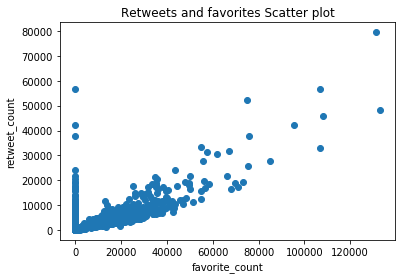

In [126]:
plt.scatter(new_data['favorite_count'], new_data['retweet_count'])
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')
plt.title('Retweets and favorites Scatter plot')

# +ve correlation between favorites and retweets

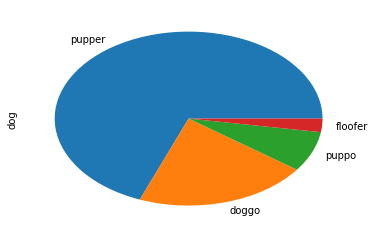

In [135]:
 new_data.dog.value_counts().plot(kind='pie');

# dogs in pupper stage get most tweets